In [ ]:
import pandas as pd 
import numpy as np 


df = pd.read_csv(r"D:\portfolio\Fractal MMM\Assignment\PYQ2\data\mmm_data_cleaned.csv")

In [2]:
# Lag variables
df['lag_gasoline'] = df['Gasoline Price'].shift(1)

df.dropna(inplace=True)

In [3]:
# Select features for additive model
additive_features = [
    'Sales', 'Average Price', 'Total SKU',
    'Paid Search Impressions', 'Paid Social Impressions', 'Modular Video Impressions',
    'Email Clicks', 'Organic Search Impressions',
    'Discount1', 'Discount2', 'Holiday Dummy', 'lag_gasoline', 'Month'
]

df_additive = df[additive_features]

In [4]:
# Fit OLS additive regression
import statsmodels.api as sm

X = df_additive.drop(columns='Sales')
X = sm.add_constant(X)
y = df_additive['Sales']

model_additive = sm.OLS(y, X).fit()
model_additive_summary = model_additive.summary()

model_additive_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     17.43
Date:                Sun, 13 Apr 2025   Prob (F-statistic):           1.41e-13
Time:                        23:25:44   Log-Likelihood:                -968.80
No. Observations:                  61   AIC:                             1964.
Df Residuals:                      48   BIC:                             1991.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       8.302e+07   7.61e+07      1.090      0.281   -7.01e+07    2.36e+08
Average Price              -6.346e+05   3.78e+06     -0.168      0.867   -8.23e+06    6.96e+06
Total SKU                     -0.4769      0.579     -0.823      0.414      -1.642       0.688
Paid Search Impressions      119.2304    206.937      0.576      0.567    -296.844     535.305
Paid Social Impressions       -0.0330      0.008     -4.256      0.000      -0.049      -0.017
Modular Video Impressions      0.0246      0.089      0.276      0.784      -0.154       0.203
Email Clicks                  -0.2962      2.901     -0.102      0.919      -6.130       5.537
Organic Search Impressions     7.6078      1.536      4.953      0.000       4.519      10.696
Discount1                  -2.725e+06   6.57e+06     -0.414      0.680   -1.59e+07    1.05e+07
Discount2                  -3.724e+06   4.92e+06     -0.757      0.453   -1.36e+07    6.17e+06
Holiday Dummy              -1.154e+07   3.18e+06     -3.628      0.001   -1.79e+07   -5.14e+06
lag_gasoline               -1.042e+04   3964.540     -2.628      0.012   -1.84e+04   -2445.756
Month                      -7.584e+05   1.67e+05     -4.535      0.000   -1.09e+06   -4.22e+05
==============================================================================
Omnibus:                        1.771   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.412   Jarque-Bera (JB):                1.725
Skew:                          -0.386   Prob(JB):                        0.422
Kurtosis:                       2.713   Cond. No.                     7.08e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.08e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


## **Additive OLS Model – Summary of Results**


### **Model Performance**

- **R² = 0.813**  
    The model explains about **81% of the variation** in weekly sales — strong performance for a marketing mix model.
- **Adjusted R² = 0.767**  
    Still solid after adjusting for the number of variables in the model.
- **Overall significance (F-stat p-value = 1.41e-13)**  
    The model is **highly statistically significant**, meaning it reliably explains the relationship between inputs and sales.

### **Key Coefficient Insights**

| Feature                        | Coefficient | What It Means                                            | Significant? |
| ------------------------------ | ----------- | -------------------------------------------------------- | ------------ |
| **Organic Search Impressions** | +7.61       | Strongest positive driver — organic content matters      | ✅ Yes        |
| **Paid Social Impressions**    | -0.033      | Negative impact — may reflect saturation or inefficiency | ✅ Yes        |
| **Holiday (Dummy)**            | -11.54M     | Sales drop sharply during holiday weeks                  | ✅ Yes        |
| **Month (Seasonality)**        | -758K       | Sales trend downward in later months                     | ✅ Yes        |
| **Lagged Gasoline Price**      | -10.4K      | Economic pressure slightly reduces sales                 | ✅ Yes        |


### **Variables with Low Statistical Significance**

- **Price, SKU Count, Discount1, Discount2, Email, Video, Paid Search**  
    These variables did **not show statistically significant effects** in this model — either due to noise, overlap with other predictors, or weak influence.


### **Strategic Takeaways**

- **Organic Search** stands out as the **most effective sales driver** — suggests high intent and good conversion efficiency.
- **Paid Social’s negative effect** is unexpected — may point to **ineffective campaigns**, **overspending**, or **overlap with other media**.
- **Holidays and seasonal patterns** are impacting sales — some weeks may be more about store closures than festive demand.
- **Gasoline prices** and **macro trends** are also affecting consumer behavior, confirming the importance of economic context.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Assuming 'model' is your fitted OLS model from statsmodels
fitted_vals = model_additive.fittedvalues
residuals = model_additive.resid
standardized_residuals = model_additive.get_influence().resid_studentized_internal


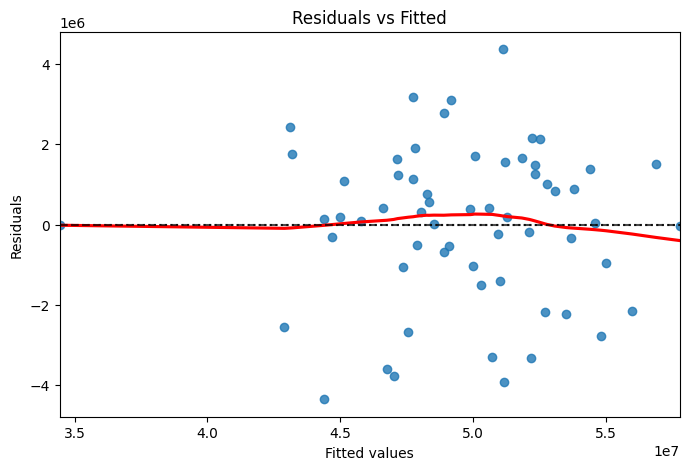

In [7]:
plt.figure(figsize=(8, 5))
sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.axhline(0, linestyle='--', color='black', alpha=0.7)
plt.show()


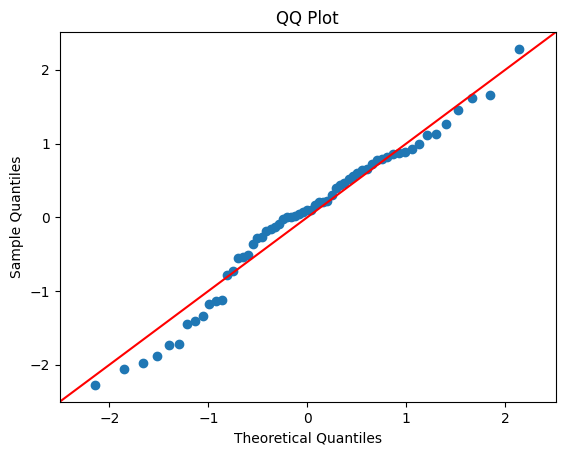

In [8]:
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot")
plt.show()